<a href="https://colab.research.google.com/github/shailajgg/Git-Class-Fall-2023/blob/main/Cloud_hosted_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INGEST**

**Classification of Flower Species with the Iris Database**


In [1]:
from sklearn.datasets import load_iris
iris = load_iris()


The 'Design Matrix' can be extracted as iris.data, while the target variable can be obtained with iris.target. With this data on the table, our goal is simple; we want to classify the species of the flowers in our database, but this time we will take advantage of the labels included in iris.target.

We will use an SVC model, i.e., a Support Vector Classifier.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from ipywidgets import interact, FloatSlider, IntSlider
from sklearn import preprocessing, datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
sns.set_theme()
from sklearn.svm import SVC

print(iris.target)

from sklearn.datasets import load_iris
import pandas as pd

# Let's extract some statistics from the data
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
summary_stats = df.describe()

print(summary_stats)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min 

In [4]:
feature_names = iris.feature_names

# Extract the features of each attribute, as well as the independent variable we will be predicting
print("Feature names:", feature_names)
target_names = iris.target_names
print("Target names:", target_names)

# Obtain a correlation matrix
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
correlation_matrix = iris_df.corr()

print(correlation_matrix)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


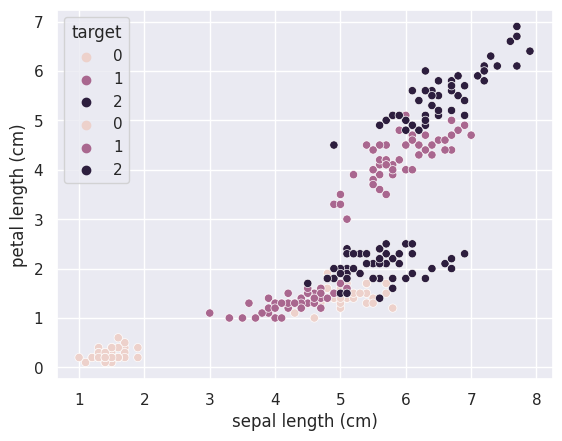

In [5]:
# The strongest correlation observed is between "petal width (cm)" and "petal length (cm)"

import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()

# Create a DataFrame including the attribute names
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Include target classifications
iris_df['target'] = iris.target

# Plot the scatter plot between the variables "sepal length (cm)" and "petal length (cm)" to see the correlation of .817941
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', data=iris_df, hue='target')

# When plotting the 2 sets of variables with the highest correlation, one might think that visually, separations would be easier using the labels "petal length (cm)" and "petal width (cm)"

iris_df['target'] = iris.target
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=iris_df, hue='target')

import seaborn as sns
import matplotlib.pyplot as plt

# Separate our design matrix and target variable
X = iris.data
y = iris.target
#print(y)

# Split the sample into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.25,
                                                   random_state=36)


# Scale the design matrix
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_S = X_train.copy()
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Initialize our classifier
clf = svm.SVC(kernel='linear')

# Train the model
clf.fit(X_train, y_train)

# Save the coefficients and their names
H = clf.coef_

feature_names = iris.feature_names
print("Feature names:", feature_names)

target_names = iris.target_names
print("Target names:", target_names)

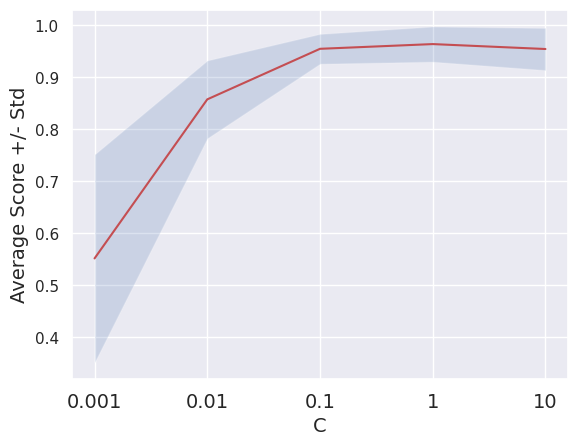

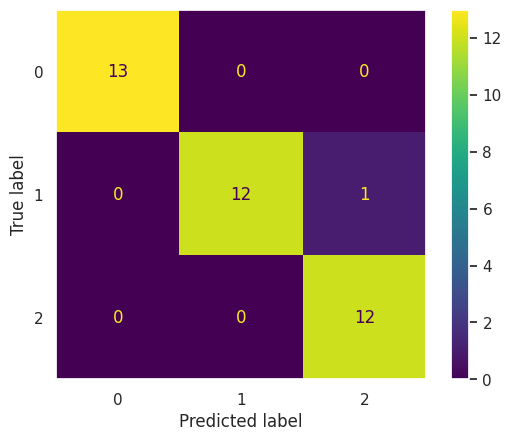

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Set the search space
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

# Define the SVM model and cross-validation with GridSearchCV
clf = svm.SVC(kernel='linear')
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Extract the results from GridSearchCV
scores = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
C_vals = [str(val) for val in param_grid['C']]

# Plot the scores as a function of hyperparameters
plt.semilogx(param_grid['C'], scores, 'r')
plt.fill_between(param_grid['C'], scores - stds, scores + stds, alpha=0.2)
plt.xlabel("C", fontsize="14")
plt.ylabel("Average Score +/- Std", fontsize="14")
plt.xticks(param_grid['C'], C_vals, fontsize="14")
plt.show()

# In this case, considering the lower variance the data could have, I would choose a hyperparameter C=0.1
# Where the trade-off between variance and prediction score is not maximized

# Initialize our classifier using the hyperparameter we selected above
clf = svm.SVC(kernel='linear', C=0.1)

# Train the model
clf.fit(X_train, y_train)

# Save the coefficients and their names
H = clf.coef_

# Use X_test to generate predictions
y_pred = clf.predict(X_test)
residuals = y_test - y_pred

# Generate a visualization
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.grid(False)
plt.show()